### Codio Activity 13.1: Binary Classification with Regression

This activity motivates the later work with logistic regression.  To begin, you will build a linear regression model to solve a binary classification problem.  In order to use the model, you will have to determine a threshold for the single input feature.  Using this model you will determine its accuracy on a test set.   

#### Index 

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import seaborn as sns

### The Data

The dataset used in this activity is similar to that from the videos, containing body information on three different kinds of penguins in Antarctica.  The task is to differentiate between these classes using the body measurements, sex, and location data. 

In [2]:
penguins = sns.load_dataset('penguins').dropna()

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


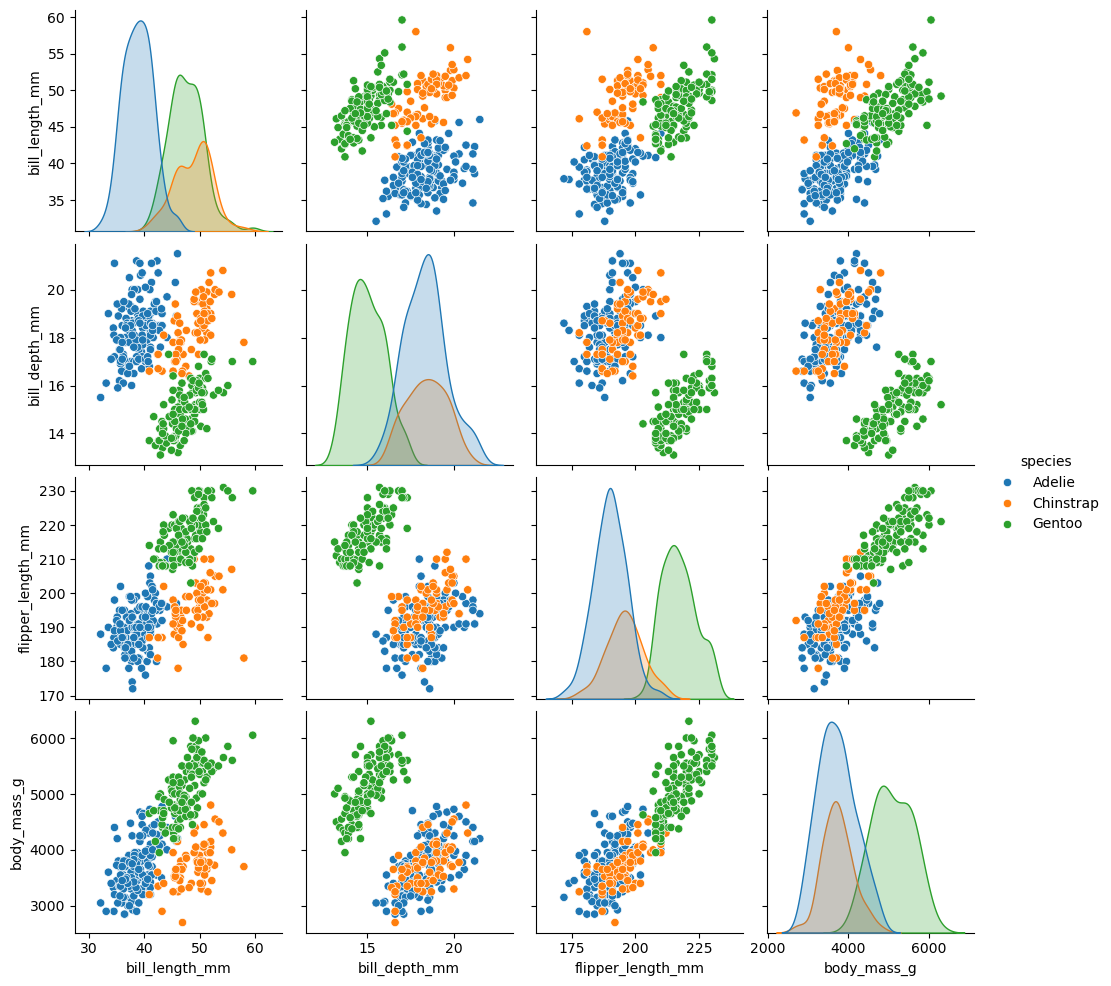

In [4]:
sns.pairplot(penguins, hue = 'species')

### Problem 1

#### Binarizing the Problem

**5 Points**

Use the function `loc()` on the `penguins` dataframe to subset only penguins belonging to `species` `Adelie` and `Gentoo`.  

Assign your DataFrame to `binary_penguins` below.  

In [6]:
binary_penguins = penguins.loc[penguins['species'].isin(['Adelie','Gentoo'])]
binary_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### Problem 2

#### Building a Regression Model

<center>
    <img src = 'codio_13_1_solution/images/lr.png'/>
</center>

In this question, you will instantiate a linear regression model.

To begin, assign the `flipper_length_mm` column of the `penguis` dataframe to the variable `X`. Next, assign a numeric representation of the `species` column with `Adelie` = 0 and `Gentoo` = 1 to the variable `y`.  

Finally, instantiate a linear regression model to the variable `lr_flipped` and fit it to the variable `X` and `y`.

HINT: To create the binary numeric values for `y`, use the function `.map()`.

In [7]:
# df['col'].map({'row0':0,'row1':1})
X = binary_penguins[['flipper_length_mm']]
y = binary_penguins['species'].map({'Adelie': 0, 'Gentoo': 1})

In [8]:
y.head()

0    0
1    0
2    0
4    0
5    0
Name: species, dtype: int64

In [9]:
lr_flipped = LinearRegression().fit(X,y)
lr_flipped

LinearRegression()

### Problem 3

#### Coeficients and Threshold

<center>
    <img src = 'codio_13_1_solution/images/thresh.png'/>
</center>

The idea here is to use `.5` to calculate the threshold for classification.  So if

$$P(Gentoo) = \beta_0 + \beta_1*X,$$

the threshold would be determined by 

$$\text{threshold} =  \frac{0.5 - \beta_0 }{\beta_1}.$$

Determine the value of the threshold using the coefficients derived from your `lr_flipper` model in the prvious question.  Assign it as a float to `threshold` below.

In [12]:
threshold = float((0.5 - lr_flipped.intercept_) / lr_flipped.coef_)
threshold

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_1639/2822851729.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  threshold = float((0.5 - lr_flipped.intercept_) / lr_flipped.coef_)


203.992193482831

### Problem 4

#### Making predictions with the model

An option to make predictions, would be to evaluate the flipper length using the linear model. If the predicted value of the flipper length is greater than or equal to the threshold predict 1, otherwise predict 0.  

Below, complete the function `linear_preds` to make these predictions. 


In [13]:
def linear_preds(X, threshold, model):
    """Creates predictions using a model based on >= threshold on 
    array X.
    
    Arguments
    ---------
    X: Input Array (N, 1)
    y: threshold
       float for which threshold >= 0.5 will predict 1
    model: scikitlearn model with .coef_ and .intercept_
    
    Returns
    -------
    numpy.array of 0 and 1 based on prediction threshold
    """
    return None

In [14]:
def linear_preds(X,threshold, model):
    pred = model.coef_ * X + model.intercept_
    return np.where(pred >= threshold, 1, 0)


In [15]:
preds = linear_preds(X,0.5, lr_flipped)
preds

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

### Problem 5

#### Evaluating the accuracy of the model

In the code cell below, determine the accuracy of your linear model by comparing the values of `preds` and `y`. 


Assign your value as a float to `linear_acc` below. 

HINT: Use the function `ravel()` on the `preds` to flatten the array.

In [16]:
linear_acc = sum(preds.ravel() == y) / len(y)
linear_acc

0.9849056603773585

### Codio Activity 13.2: Introduction to Logistic Regression with Scikit-Learn

This activity introduces the `LogisticRegression` estimator from scikit-learn.  After fitting the model on a single feature for binary classes, you will plot the sigmoid curve to represent the learned model in terms of probabilities.  Finally, you will evaluate the model in terms of accuracy, precision, and recall.  

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)
- [Problem 6](#-Problem-6)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

from scipy.optimize import minimize

In [5]:
penguins = sns.load_dataset('penguins').dropna()
penguins = penguins.loc[(penguins['species'] == 'Adelie') | (penguins['species'] == 'Gentoo')]
X = penguins.drop('species', axis = 1)[['flipper_length_mm']]
y = np.where(penguins.species == 'Adelie', 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Text(0.5, 1.0, 'Flipper Length by Species')

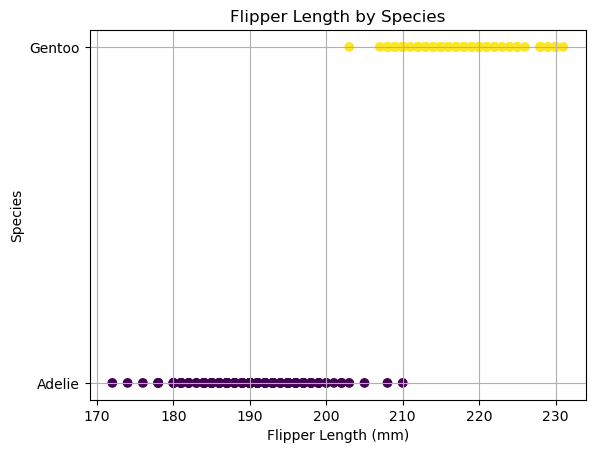

In [9]:
plt.scatter(X,penguins['species'],c = y)
plt.grid()
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Species')
plt.title('Flipper Length by Species')

### Problem 1

#### Building a Logistic Model

Instantiate and fit a `LogisticRegression` estimato the the `log_reg` variable on the training data `X_train` and `y_train`. 
 

In [12]:
log_reg = LogisticRegression().fit(X_train,y_train)
log_reg


LogisticRegression()

### Problem 2

#### Examining the coefficients

Similar to the `LinearRegression` estimator, your `log_reg` estimator now has a `.coef_` and `.intercept_` attribute.  Your goal is to calculate a linear combination of the input with these coefficients and intercept terms.

Below, complete the function `linear_predictions` that takes in a fit regression model `model`, and a feature array `X`.  This function should return the predictions according to the formula: $$ \text{intercept} + \text{coef}*X$$ 

In [14]:
def linear_predictions(model, X):
    """
    This function takes in a fit linear model
    and returns the models intercept + coefs*X
    
    Arguments
    ---------
    model: scikitlearn.linear_model 
           Linear Model estimator -- Linear or Logistic Regression
           that is already fit
    X: pd.DataFrame (N,1)
        1 Feature DataFrame with 1 feature
        
    Returns
    --------
    odds: pd.DataFrame
         Array of odds based on input X
    """
    return None

In [22]:
def linear_predictions(model, X):
    preds = model.intercept_ + model.coef_ * X
    return preds

In [23]:
predictions = linear_predictions(log_reg, X_train)
predictions

,flipper_length_mm
92,-17.038010
340,7.026310
43,-8.214426
220,3.817734
253,19.058470
...,...
25,-15.433722
263,7.828454
77,-17.840154
112,-10.620858


### Problem 3

#### Examining the log odds

**10 Points**

The predictions above are the logarithmic odds for the positive class.  In order to interpret these as probabilities, you need to return to the original sigmoid form using the formula:

$$\sigma(x) = \frac{1}{1 + e^{-(ax + b)}}$$

Complete the function `sigma` below that takes as input the array  `predictions`. This function should return the values of the sigmoid function evaluated at `predictions`.  The results should look like the image below when plotted.

<center>
    <img src = 'codio_13_1_solution/images/sigmoid.png' />
</center>

In [24]:
def sigma(predictions):
    """
    This function takes in predictions as log odds and
    returns their probability of being the positive class
    in a binary classification setting.
    
    Arguments
    ---------
    predictions; np.array
            array of log odds prediction values for each data
            point
    Returns
    ---------
    probabilities: np.array
            array of probabilities for positive class
    """
    return None

In [25]:
def sigma(predictions):
    return 1/ (1 + np.exp(-predictions))


In [26]:
probs = sigma(predictions)
probs

,flipper_length_mm
92,3.985530e-08
340,9.991126e-01
43,2.706465e-04
220,9.784951e-01
253,1.000000e+00
...,...
25,1.982529e-07
263,9.996019e-01
77,1.786979e-08
112,2.440109e-05


### Problem 4

#### Making Class Predictions

In this exercise you will use the probabilities obtained from the sigmoid function to make predictions.  

Specifically, if a probability is greater than or equal to 0.5, assign this to the positive class `1`, otherwise assign it to the class `0`.  Assign your solution as a numpy array to `class_predictions` below.

In [27]:
class_predictions = np.where(sigma(predictions) >= 0.5, 1, 0)
class_predictions

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [28]:
print(np.unique(class_predictions, return_counts=True)[1])

[105  93]


### Problem 5

#### Using the `predict_proba` method

You don't need to go through this process each time you fit a Logistic model to determine these probabilities. 

The `LogisticRegression` estimator has a `.predict_proba` method to calculate the predictions that returns the probabilities for each class as a 2D NumPy array. 

Below, use the `.predict_proba` method of the `logreg` object on the test data `X_test` as a 1D NumPy array. Assign the result to `positive_probs`.


In [30]:
positive_probs = log_reg.predict_proba(X_test)
positive_probs[:,1]

array([9.99983906e-01, 1.34483501e-03, 8.01221609e-09, 7.22191708e-10,
       1.34483501e-03, 3.98552997e-08, 9.95601231e-01, 4.42166732e-07,
       8.03971215e-01, 6.03426793e-04, 9.99821474e-01, 9.53273482e-01,
       3.22466796e-02, 1.21366990e-04, 9.99999988e-01, 9.99999974e-01,
       9.99996764e-01, 9.99983906e-01, 8.88899738e-08, 9.86171727e-07,
       1.21366990e-04, 1.21366990e-04, 2.70646527e-04, 9.99999998e-01,
       9.99999995e-01, 3.22466796e-02, 2.70646527e-04, 1.98252855e-07,
       2.19947353e-06, 9.95601231e-01, 7.22191708e-10, 6.03426793e-04,
       1.98252855e-07, 1.34483501e-03, 9.99112585e-01, 9.86171727e-07,
       9.99998549e-01, 5.86748759e-12, 2.19947353e-06, 9.90242156e-01,
       6.91758782e-02, 1.61071691e-09, 9.01450482e-01, 2.44010917e-05,
       9.99964105e-01, 7.22191708e-10, 3.98552997e-08, 9.78495080e-01,
       5.44205516e-05, 2.19947353e-06, 9.90242156e-01, 1.45184101e-10,
       4.90551135e-06, 9.99112585e-01, 9.90242156e-01, 3.98552997e-08,
      

In [31]:
print(positive_probs.shape)

(67, 2)


### Problem 6

#### Scoring the Classifier

You may be interested in different metrics for your classifier.  

Below, use the `predict` function of the `logreg` method with arugmemnt equal to `X_test` to calculate your predictions. Assign the result to `preds`.

Then, use the functions `accuracy_score`, `precision_score`, and `recall_score`to calcutate the accuracy, precision, and recall for your model. Assing the results to `accuracy`, `precision`, and `recall`, respectively.


In [32]:
preds = log_reg.predict(X_test)
preds

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0])

In [34]:
accuracy = accuracy_score(y_test,preds)
accuracy

0.9850746268656716

In [35]:
precision = precision_score(y_test,preds)
precision

1.0

In [36]:
recall = recall_score(y_test,preds)
recall

0.9642857142857143

From this example it seems you have a powerful classifier.  In the following activity, you will explore more about exactly where these coefficients come from and how they are determined in general.  

### Codio Activity 13.3: Determining the Logistic Functions Parameters

This activity focuses on determining the appropriate parameters for the logistic model using optimization.  To begin, you will write a function to represent $\sigma(x)$.  Then, you will use the scikit-learn metric `log_loss` to evaluate the cross entropy based on the probabilities.  Finally, you will explore different parameters to select that which minimizes the cross entropy.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [38]:
penguins = sns.load_dataset('penguins').dropna()
penguins = penguins.loc[(penguins['species'] == 'Adelie') | (penguins['species'] == 'Gentoo')]
X = penguins.drop('species', axis = 1)[['flipper_length_mm']]
y = np.where(penguins.species == 'Adelie', 0, 1)

### The Problem

As discussed in the lectures, under Gaussian assumptions of the data distributions, you are able to directly compute the parameters for the logistic model.  However, this is not going to work in higher dimensional settings.  As how in the figure below, this assumption seems reasonable for the flipper length of our penguins data.

<center>
    <img src = 'codio_13_3_solution/images/flipperdist.png' />
</center>

However, rather than using the mean and variance of these distributions learned through maximum likelihood, we will frame the problem of parameter estimation as one of minimization, and among a range of possible $\beta$ values, select that which minimized cross entropy.

### Problem 1

#### Sigma Function

Complete the definition of the `sigma` function  below that takes in an array `x`, `beta_0`, `beta_1`. this function should return the evaluation of the Sigma function according to the formula:

$$\sigma(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}$$

In [40]:
def sigma(x, beta_0, beta_1):
    """
    This function evaluates the sigmoid function with 
    given parameters beta_0 and beta_1
    
    Argments
    --------
    x: np.array
       domain for evaluation of sigma
    beta_0: float
       intercept term of linear function
    beta_1: float
        slope of linear term
    
    Returns
    -------
    np.array 
    """
    return None

In [43]:
def sigma(x, beta_0, beta_1):
    return 1/ (1 + np.exp(-beta_0 - beta_1*x))

In [44]:
print(sigma(X,1,1))

     flipper_length_mm
0                  1.0
1                  1.0
2                  1.0
4                  1.0
5                  1.0
..                 ...
338                1.0
340                1.0
341                1.0
342                1.0
343                1.0

[265 rows x 1 columns]


### Problem 2

#### Using a given $\beta_0$ and $\beta_1$ for predictions

The `sigma` function should return probabilities for making a classification.  

Use the `sigma` function defined in problem 1 and and the given `beta_0` and `beta_1` below to create predictions on the array `X`. Assign this result to the `probs` variable.



Next, if the value inside `probs` is greater than or equal to `.5` predict class `1`, otherwise predict `0`. Assign subsequent predictions based on these probabilities to the `predictions` variable.  


In [45]:
beta_0 = -165
beta_1 = 0.7

In [46]:
probs = sigma(X, beta_0, beta_1)
predictions = np.where(probs>= 0.5,1,0)
predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

### Problem 3

#### Computing the Cross Entropy

Recall that our goal is to find the vales of `beta_0` and `beta_1` that minimize the cross entropy give by:

$$-\sum_{i = 1} ^ N \big( (1 - y_i)\log(1 - \sigma(x_i)\big) + \big(y_i(\log \sigma(x_i) \big)$$

Scikit-learn has an implementation of the cross entropy with the `log_loss` function imported below.


To use this, we want to pass an array of probabilities for both the positive and negative classes against the true `y` values.  Below, this array is created for you using the earlier probabilities. 


In the code cell below, use the `log_loss` function on `y` and `prob_array` to conpute the cross entropy. Assign the value to `loss1` below.  

In [47]:
from sklearn.metrics import log_loss

In [48]:
prob_array = np.concatenate((probs.values, (1 - probs).values), axis = 1)
pd.DataFrame(prob_array, columns = ['probability 0', 'probability 1']).head()

,probability 0,probability 1
0,2.325527e-17,1.0
1,7.701087e-16,1.0
2,4.193796e-13,1.0
3,1.034177e-13,1.0
4,1.266417e-14,1.0


In [49]:
loss1 = log_loss(y,prob_array)
loss1

17.345597211171192

### Problem 4

#### Comparing Loss across Parameters

Remember that your goal is to identify the parameters that **minimize** the log loss.  However, we know the rough values of this from our last assignment -- at least the values that come from the solved optimization problem with Scikit-learn.  

Accordingly, consider an array of parameters `beta_1s`.  Complete the code below to loop over `beta_1s`. Inside the `for` loop, use the `sigma` function to evaulate the probabilies. Assign this result to `probs`. Next, use the NumPy function `concatenate` to pass an array of probabilities for both the positive and negative classes against the true `y` values. Assign this result to ` prob_array`. Finally, use the `log_loss` function to compute the cross entropy loss of true `y` against `prob_array`. Store this result  as a list in the `losses` variable.  

Finally, determine the `beta_1` that minimizes the `log_loss` and assign it as a float to `best_beta1`.

In [50]:
beta_1s = np.linspace(0, 1, 1000) #array of beta_1's to use
beta_0 = -142 #beta_0

In [52]:
losses = []
for i in beta_1s:
    probs = sigma(X,beta_0,i)
    prob_array = np.concatenate((probs.values,(1-probs).values), axis = 1)
    losses.append(log_loss(y, prob_array))


In [53]:
losses

[19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,
 19.85801281060794,


In [54]:
min(losses)

9.473240024333766

In [56]:
best_beta1 = beta_1s[losses.index(min(losses))]
best_beta1

np.float64(0.7087087087087087)

### Problem 5

#### Comparing the results to `LogisticRegression`

In reality, a solver that implements gradient descent is used to target the optimal parameter values.  Specifically, the solvers `'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'` are available and `liblinear` is the default.  

As a check, implement a `LogisticRegression` estimator with all default settings and examine the coefficient.  Is it close to what you selected in Problem 4 above?  

Assign your fit estimator as `log_reg` the coefficient as a float to `coef` and the absolute difference between the coefficient from scikitlearn and that of `best_beta1` from Problem 4 as difference.

In [57]:
logreg = LogisticRegression().fit(X, y)
coef = float(logreg.coef_)
difference = abs(coef - best_beta1)

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_1440/2767186853.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coef = float(logreg.coef_)


In [58]:
print(f'Beta_1 from sklearn: {coef}\nBeta_1 from our minimization: {best_beta1}\nDifference: {difference: .2f}')

Beta_1 from sklearn: 0.6948193765225736
Beta_1 from our minimization: 0.7087087087087087
Difference:  0.01
